In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


In [6]:
count = df.isnull().sum()
print(count)

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


In [7]:
df.shape

(11914, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [9]:
df.dtypes


Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [12]:
df = df.drop(['Engine Fuel Type','Market Category','Vehicle Style','Popularity','Number of Doors','Vehicle Size'],axis=1)

In [13]:
df.shape

(11914, 10)

In [14]:
df = df.rename(columns={'Engine HP':'HP',
                        'Engine Cylinders':'Cylinder',
                        'Transmission Type':'Transmission',
                        'Driven_Wheels':'Drive mode',
                        'highway MPG':'MPG-H',
                        'city mpg':'MPG-C',
                        'MSRP':'Price'})

In [15]:
df.head(1)

,Make,Model,Year,HP,Cylinder,Transmission,Drive mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135


In [16]:
duplicated_row_df = df[df.duplicated()]
print('Duplicate rows',duplicated_row_df.shape)

Duplicate rows (989, 10)


In [21]:
df = df.drop_duplicates()

In [22]:
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinder        10895
Transmission    10925
Drive mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

In [28]:
df['HP'].isnull().sum()

np.int64(69)

In [29]:
df = df.dropna()

In [30]:
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinder        10827
Transmission    10827
Drive mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

In [35]:
# outlier detection
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3-Q1
print(IQR)

lower_bound = Q1-(1.5*IQR)
upper_bound = Q3+(1.5*IQR)
print(lower_bound)
print(upper_bound)

21327.5
-10018.75
75291.25


Text(0.5, 0, 'Make')

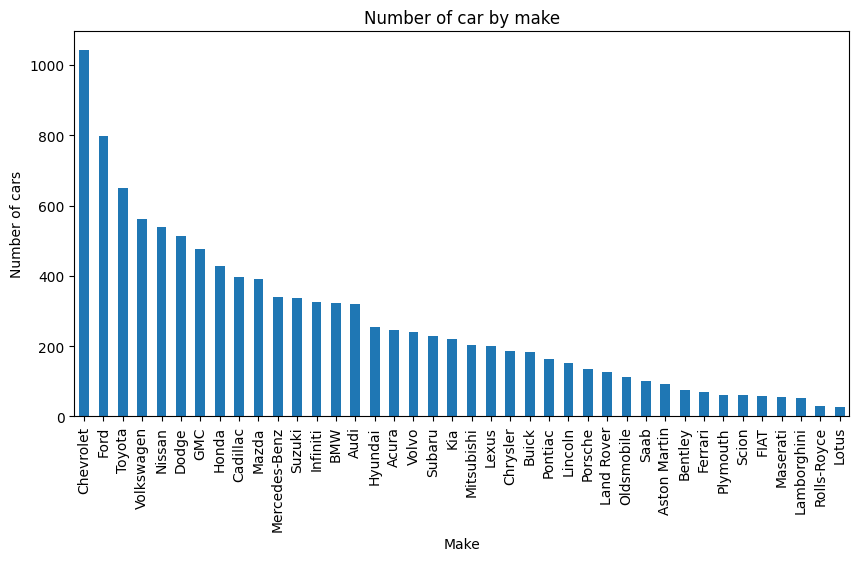

In [38]:

df.Make.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))
plt.title('Number of car by make')
plt.ylabel('Number of cars')
plt.xlabel('Make')


In [33]:
import seaborn as sns

In [ ]:
sns.boxplot(x=df['Price'])

<Axes: >

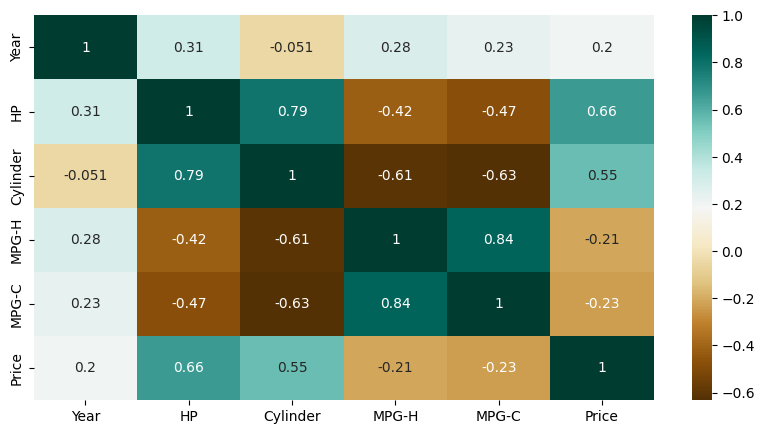

In [45]:
plt.figure(figsize=(10,5))
df= df.select_dtypes(include='number')
c = df.corr()
sns.heatmap(c,cmap='BrBG',annot=True)

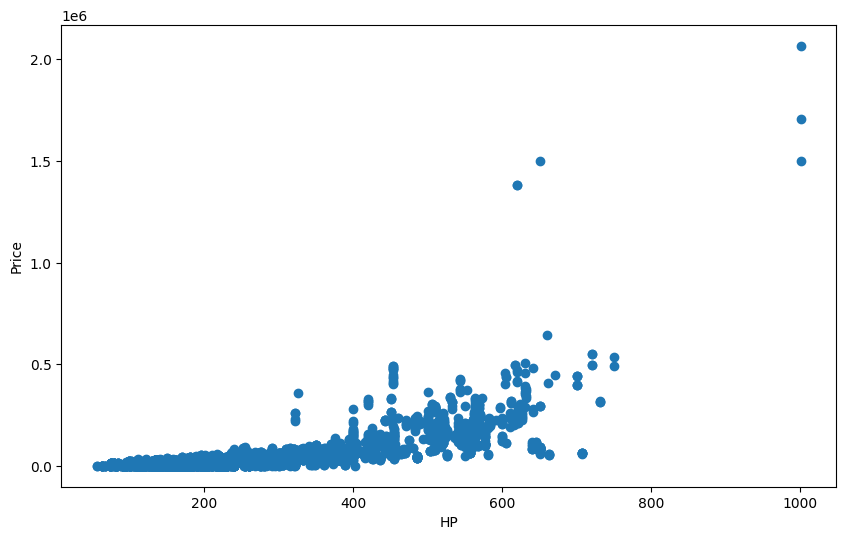

In [50]:
# scatter plot
fig,ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'],df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

In [51]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.8 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 648.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
    --------------------------------------- 0.2/8.9 MB 4.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/8.9 MB 5.9 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/8.9 MB 10.0 MB/s eta 0:00:01
   ----------- ---------------------------- 2.5/8.9 MB 14.6 MB/s eta 0:00:01
   ------------- -------------------------- 3.1/8.9 MB 15.2 MB/s eta 0:00:01
   ------------------ --------------------- 4.2/8.9 MB 15.6 MB/s eta 0:00:01
   ---------------------- ----------------- 5.0/8.9 MB 16.8 MB/s eta 0:00:01
   ------------------------- -------------- 5.7/8.9 MB 17.3 MB/s eta 0:00:01
   ---------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
